In [ ]:
# Import packages
import pandas as pd

# Load dataset
col_names = ['income', 'age', 'num_rooms', 'num_bedrooms', 'population', 'price', 'address']
housing = pd.read_csv('Housing_Data.csv', header=1, names=col_names)

# Inspect dataset
housing.head()

,income,age,num_rooms,num_bedrooms,population,price,address
0,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
1,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
2,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
3,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
4,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."


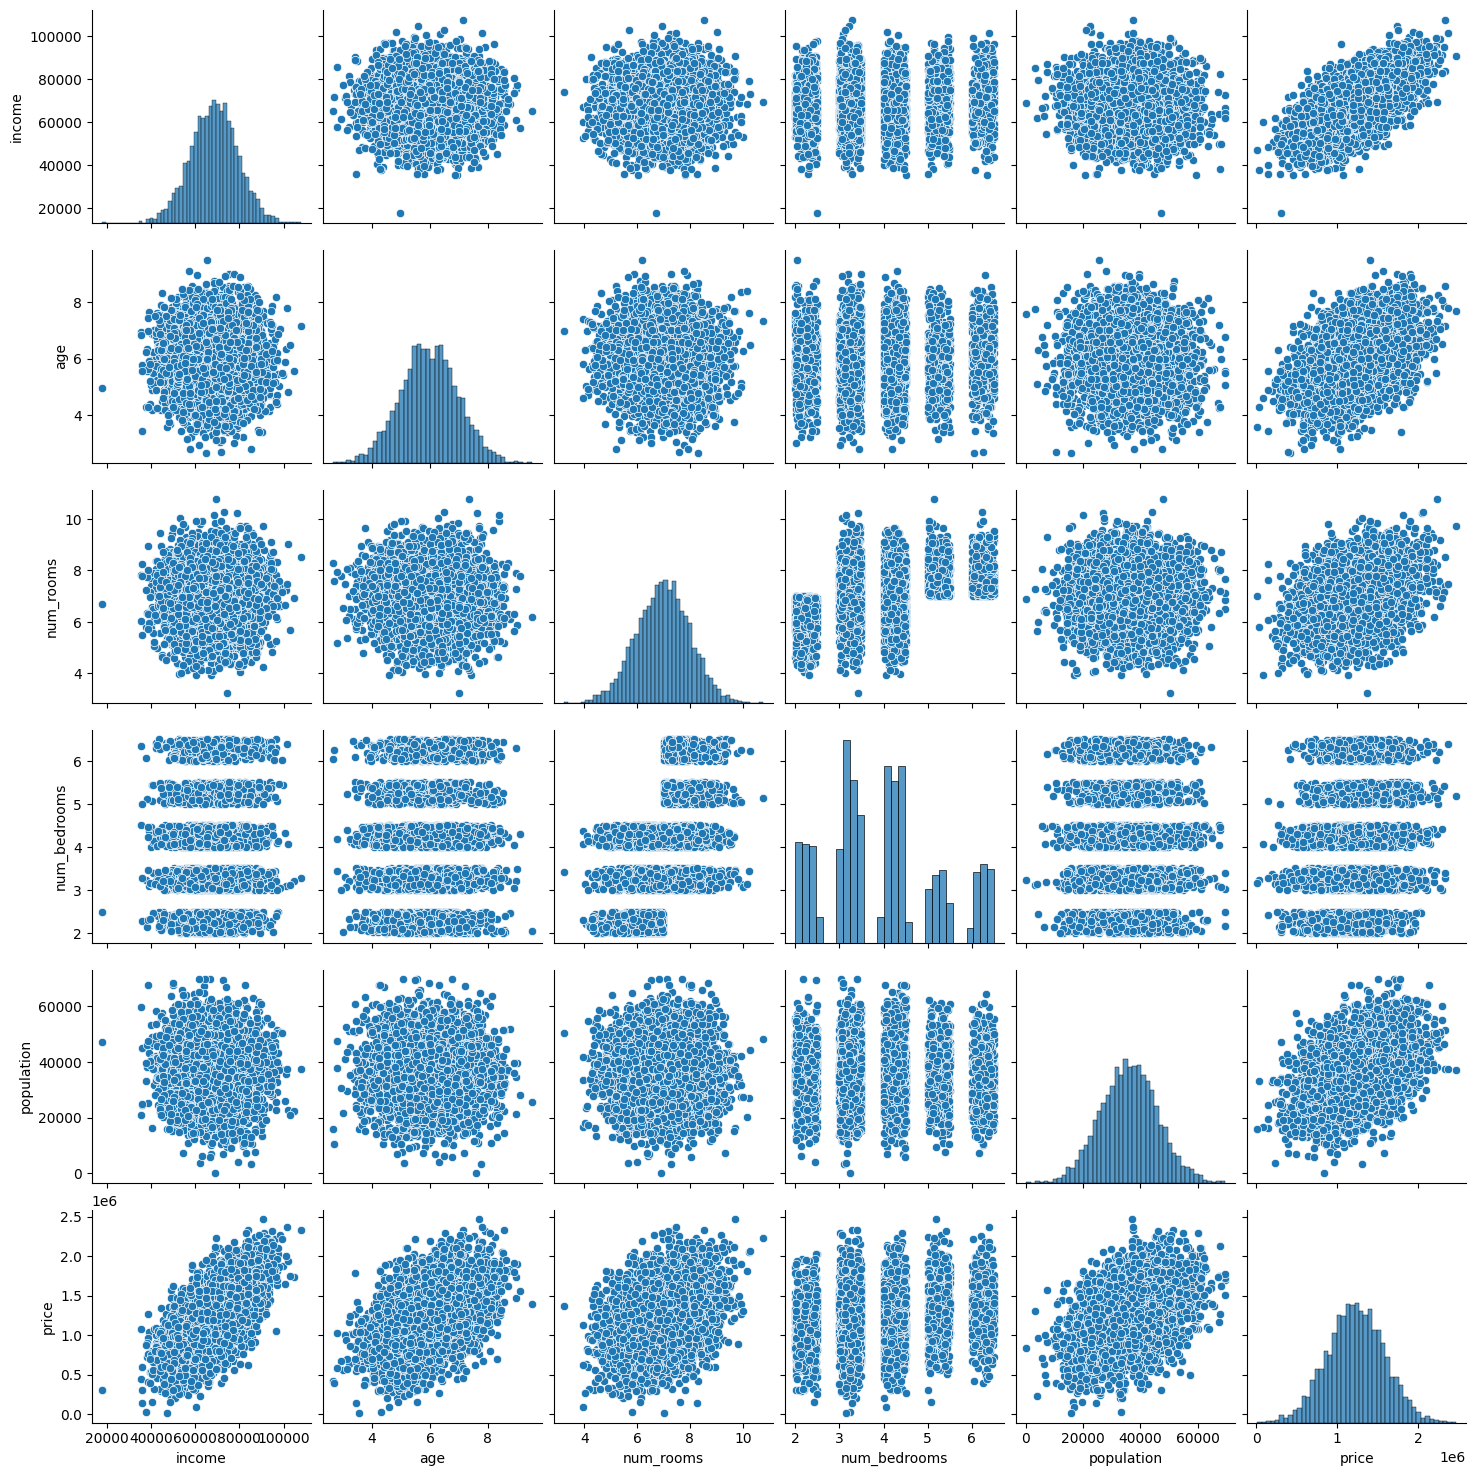

In [ ]:
import seaborn as sns
sns.pairplot(housing) # This line takes a while to run

Most of the variables appear to be normally distributed, and seem to be positively correlated with price.

In [ ]:
# Split dataset into features and target variable
feature_cols = ['income', 'age', 'num_rooms', 'num_bedrooms', 'population']
X = housing[feature_cols]
y = housing.price

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=546) # Set random_state for reproducibility

In [ ]:
from sklearn.linear_model import LinearRegression

# Create the model
linreg = LinearRegression()

# Fit the model using training data
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(linreg.coef_)
print(linreg.intercept_)

[2.15419059e+01 1.65739229e+05 1.21270301e+05 8.48221340e+02
 1.51384095e+01]
-2633488.2920349147


In [ ]:
pd.DataFrame(linreg.coef_, X.columns, columns = ['Coefficient'])

,Coefficient
income,21.541906
age,165739.229176
num_rooms,121270.301441
num_bedrooms,848.221340
population,15.138410


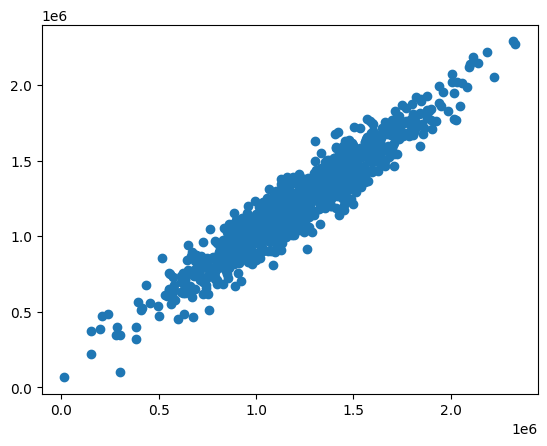

In [ ]:
pred = linreg.predict(X_test)

import matplotlib.pyplot as plt
plt.scatter(y_test, pred)

(array([  4.,  23.,  74., 181., 255., 236., 143.,  58.,  23.,   3.]),
 array([-339440.97926792, -270844.00819833, -202247.03712874,
        -133650.06605916,  -65053.09498957,    3543.87608002,
          72140.84714961,  140737.8182192 ,  209334.78928879,
         277931.76035837,  346528.73142796]),
 <BarContainer object of 10 artists>)

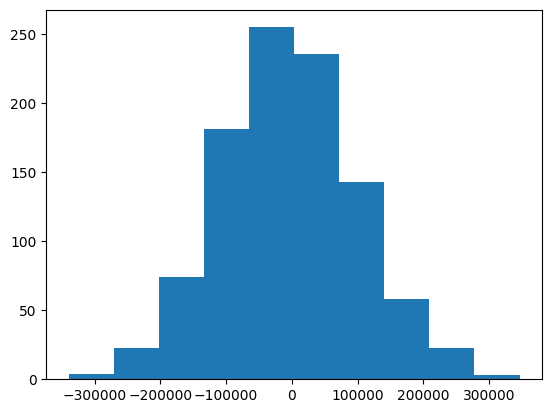

In [ ]:
plt.hist(y_test - pred)

In [ ]:
from sklearn import metrics
import numpy as np

print(metrics.mean_absolute_error(y_test, pred)) # MAE
print(metrics.mean_squared_error(y_test, pred))  # MSE
print(np.sqrt(metrics.mean_squared_error(y_test, pred))) # There's no method for RMSE, so we calculate it manually

82248.36484492049
10898957400.586512
104398.07182408357
